### Метод Ньютона

Задание

1. ответить на все вопросы в скрипте
2. изменить код метода Ньютона так, чтобы он смог разрешать все проблемные случаи, возникающие в скрипте, продемонстрировать это, объяснить почему модификация решает проблему. Проблемы - нулевая производная, кратные корни, биения. Для кратных корней надо так модифицировать метод, чтобы порядок оставался вторым и продемонстрировать это.

ВАЖНО! Модифицированный метод Ньютона должен получаться путем добавления новых строчек в simple_newton, а не переписыванием его с нуля. Новые строчки надо прокомментировать, зачем они были добавлены.

In [1]:
# простая реализация Метода Ньютона
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

def simple_newton(func, dfunc, x, tol = 1e-12):
    sol = 0
    iteration = 0
    dxs = []
    for i in range(30):
        iteration += 1
        dx = -func(x)/dfunc(x)
        dxs.append(abs(dx))
        x = x + dx
        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration]

In [140]:
# модифицированная реализация Метода Ньютона

from scipy.misc import derivative 
def newton_modified(func, dfunc, x, num_root = 1, tol = 1e-12):
    sol = 0
    iteration = 0
    xs = np.zeros(3)
    xs[0] = x
    dxs = []
    for i in range(30):
        iteration += 1
        # здесь обрабатываем обращение в 0 первой производной - логика действий описана - ниже
        if (dfunc(x) != 0):
            dx = -func(x)/dfunc(x)*num_root # num_root вносит поправку на кратный корень
        else:
            d = 0.01
            while(dfunc(x+d) == 0):
                d += d
            dx = -func(x)/dfunc(x+d)*num_root 
            
        dxs.append(abs(dx))
        x = x + dx

        # обработка биений
        if (i < 2) : 
            xs[i+1] = xs[i] + dx
        else:
            xs[0] = xs[1]
            xs[1] = xs[2]
            xs[2] = x
        if (xs[0] == xs[2]): # проверяем повторение значения итерационного члена
            x = (xs[0]+xs[2])
            iteration = 0 # для запуска итераций заново
            dx = 1
            dxs =[]        

        if abs(dx) < tol:
            sol = x
            return [sol, iteration, dxs]
    sol = float('nan')
    print('More then 30 iterations!')
    return [sol, iteration, dxs]

$\textbf{Cитуация -} $ $f'(x) = 0 \; \textbf{:} \\$
Здесь немного сдвигаем от нуля производную, чтобы была возможность посчитать смещение для итерационного члена.
$\\ \textbf{Cитуация - кратный корень:} \\$ В случае кратного корня каждый множитель вносит свой вклад в сходимость итерационного процесса (производная получается в k раз больше, k - кратность корней), поэтому вводим поправку - k. 
$\\ \textbf{Cитуация - биения:} \\$ Проверив, что повторяются иттерационные члены, находим тот, который расположен между ними, так как они колеблются около корня. И затем возобновляем итерационный процесс.

In [135]:
def plot(x, func, dfunc):
    y= []
    solution, iteration, dxs = newton_modified(func, dfunc, x)
    ddfunc = derivative(dfunc, solution)
    xn = []
    xn.append(x)
    for i in range(1, len(dxs)+1):
        xn.append( xn[i-1] - dxs[i-1])
        y.append(np.log((abs(xn[i] - solution)))/np.log(abs((xn[i-1] - solution)*abs(ddfunc/(2*dfunc(solution))))))
    xs = [i for i in range(1,len(y)+1)]
    
    plt.plot(xs, y)
    plt.grid()
    plt.xlabel('итерация')
    plt.ylabel('сходимость')
    plt.legend()
    
    

#### Нелинейное уравнение 1

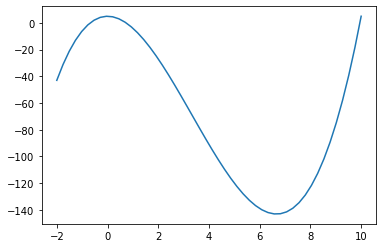

In [127]:
x = np.linspace(-2,10)
func0 = lambda x: x**3 - 10*x**2 + 5
dfunc0 = lambda x: 3*x**2 - 20*x
y = func0(x)
plt.plot(x, y)

1. Объяснить, почему различаются результаты в случае 1 и 2
2. Объяснить, что происходит в случае 3
3. Построить график порядка сходимости от номера итерации. Объяснить результат

$\bf{Ответ:} \\$  
1 - на отрезке [-2; 10] - данная функция принимает дважды нулевое значение - в окрестности 0 и в окрестности 9, выбирая разные начальные (нулевые) приближения - 8 и 0.7, мы выбираем ту окрестность, в которой метод Ньютона сходится к конкретному нулю - отсюда и получаем разные результаты. $\\$
2 - Рассчет нового итерационного члена происходит по формуле : $x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$. В данном случае $f'(x_0) = 0 \Rightarrow$ возникает ошибка при рассчете $x_1. \\$
3 -  Метод Ньютона имеет второй порядок сходимости вне зависимости от иттерации- отсюда плато. Тк нулевое приближние выбирается самостоятельно - отсюда получаем выброс в первой точке. А плато не является функцией $y = 2$ из-за поправки, вносимой константой тк в реальности соотношение имеет вид: $|x_{n+1} - x^*| \leq C|x_n - x^*|^2$.


In [128]:
data = simple_newton(func0, dfunc0, 8) # случай 1
# data = simple_newton(func0, dfunc0, 0.7) # случай 2
# data = simple_newton(func0, dfunc0, 0.0) # случай 3
print('sol = ', data[0])
print('iter = ', data[1])

sol =  9.949491057914388
iter =  7


No handles with labels found to put in legend.


sol =  9.949491057914388
iter =  10


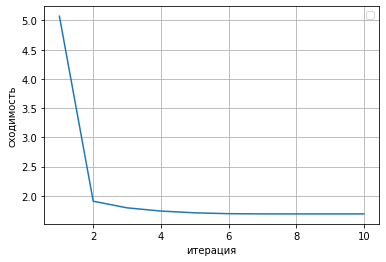

In [129]:
# data = simple_newton(func0, dfunc0, 8) # случай 1
# plot(8, func0, dfunc0)
#data = simple_newton(func0, dfunc0, 0.7) # случай 2
# plot(0.7, func0, dfunc0)
data = newton_modified(func0, dfunc0, 0.0) # случай 3
plot(0, func0, dfunc0)
print('sol = ', data[0])
print('iter = ', data[1])

#### Нелинейное уравнение 2

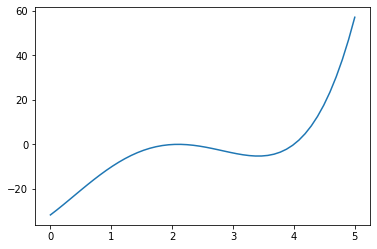

In [130]:
x = np.linspace(0,5)
func1 = lambda x: x**4 - 6.4*x**3 + 6.45*x**2 + 20.538*x - 31.752 #double root
dfunc1 = lambda x: 4.0*x**3 - 19.2*x**2 + 12.9*x + 20.538
y = func1(x)
plt.plot(x, y)

1. Построить график порядка сходимости от номера итерации. Объяснить результат
$\\ \textbf{Ответ:}$ обоснование поведения графика аналогично объяснению случая первого уравнения.

In [120]:
data = simple_newton(func1, dfunc1, 2.0)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.0999999786199406
iter =  23


In [122]:
data = newton_modified(func1, dfunc1, 2.0, 2)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  2.100000000014807
iter =  6


#### Нелинейное уравнение 3


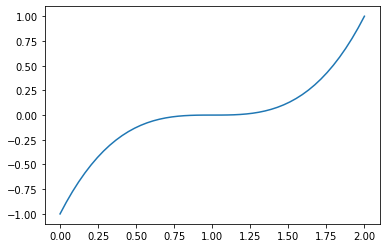

In [56]:
x = np.linspace(0,2)
func2 = lambda x: (x-1)**3
dfunc2 = lambda x: 3*(x-1)**2
y = func2(x)
plt.plot(x, y)

1. Подобрать начальное приближение и решить задачу

In [131]:
data = newton_modified(func2, dfunc2, 0.9 ,3)
print('sol = ', data[0])
print('iter = ', data[1])

sol =  1.0
iter =  2


#### Нелинейное уравнение 4

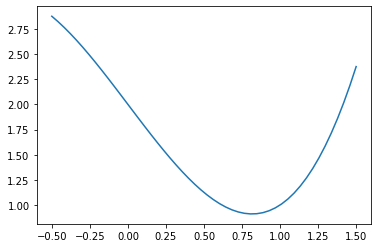

In [138]:
x = np.linspace(-0.5,1.5)
#x = np.linspace(-5,5)
func3 = lambda x: x**3 - 2*x + 2
dfunc3 = lambda x: 3*x**2 - 2
y = func3(x)
plt.plot(x, y)

1. Почему не находится решение во втором случае? $\\$
$\textbf{Ответ: }$ решение во втором случае не сходится из-за "биений" - иттерационный член повторяется с некоторой периодичностью и процесс зацикливается.

In [141]:
# data = simple_newton(func3, dfunc3, 0.5) # случай 1

#data = simple_newton(func3, dfunc3, 0) # случай 2
data = newton_modified(func3, dfunc3, 0) # случай 2
print('sol = ', data[0])
print('iter = ', data[1])

sol =  -1.7692923542386314
iter =  10
